

## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [31]:
import matplotlib.pyplot as plt
import numpy as np
#np.random.seed(123)
# m= np.random.choice(['testa','croce'], size=5)
# sum(m == 'testa') / (sum(m == 'croce') + sum(m == 'testa'))

#1-

def lancio_moneta(N):
    # np.random.seed(123)
    lancio = np.random.choice(['testa','croce'], size = N)
    freq_part = np.sum(lancio == 'testa')
    freq_part_2 = np.sum(lancio == 'croce')
    freq = freq_part / (freq_part + freq_part_2)
    return freq.item()

result = lancio_moneta(5)
print("la frequenza è : {} %\n".format(result*100))


la frequenza è : 20.0 %



In [173]:

#2-
def lancio_moneta(N):
    # np.random.seed(123)
    lancio = np.random.choice(['testa','croce'], size = N)
    freq_part = np.sum(lancio == 'testa')
    freq_part_2 = np.sum(lancio == 'croce')
    freq = freq_part / (freq_part + freq_part_2)
    # return freq.item()
    return freq_part

result = lancio_moneta(5)
list(map(int, np.linspace(0, 20000, 20)))
X =  list(map(int, np.linspace(10, 20000, 100))) 
Y = [lancio_moneta(i) for i in X ]
X



[10,
 211,
 413,
 615,
 817,
 1019,
 1221,
 1423,
 1625,
 1827,
 2029,
 2231,
 2433,
 2634,
 2836,
 3038,
 3240,
 3442,
 3644,
 3846,
 4048,
 4250,
 4452,
 4654,
 4856,
 5057,
 5259,
 5461,
 5663,
 5865,
 6067,
 6269,
 6471,
 6673,
 6875,
 7077,
 7279,
 7481,
 7682,
 7884,
 8086,
 8288,
 8490,
 8692,
 8894,
 9096,
 9298,
 9500,
 9702,
 9904,
 10105,
 10307,
 10509,
 10711,
 10913,
 11115,
 11317,
 11519,
 11721,
 11923,
 12125,
 12327,
 12528,
 12730,
 12932,
 13134,
 13336,
 13538,
 13740,
 13942,
 14144,
 14346,
 14548,
 14750,
 14952,
 15153,
 15355,
 15557,
 15759,
 15961,
 16163,
 16365,
 16567,
 16769,
 16971,
 17173,
 17375,
 17576,
 17778,
 17980,
 18182,
 18384,
 18586,
 18788,
 18990,
 19192,
 19394,
 19596,
 19798,
 20000]

Text(0, 0.5, 'numero medie di teste')

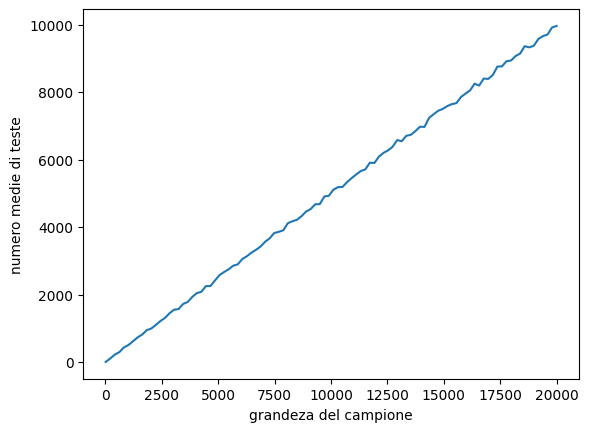

In [174]:
#3-
len(X), len(Y)
plt.plot(X, Y)
plt.xlabel("grandeza del campione")
plt.ylabel("numero medie di teste")


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [43]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

#1-
num_col = df.shape[0]
num_rig = df.shape[1]
print("il numero di righe è : {}\n".format(num_col))
print("il numero di colonne è : {}\n".format(num_rig))


il numero di righe è : 891

il numero di colonne è : 12



In [44]:

#2-
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:

#3-
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [48]:

#4-
df = df.dropna(subset=["Age"])
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [50]:

#5-
df.duplicated().sum().item()


0

In [94]:
#6-
df.isna().sum()
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.columns
df["Pclass"].value_counts()
age = df.groupby("Pclass")["Age"].mean()
age


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

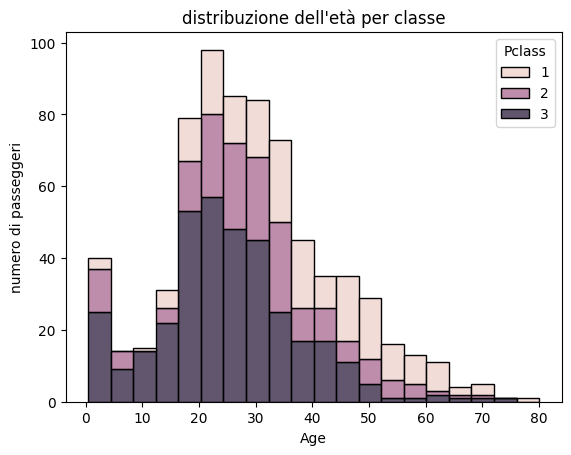

In [100]:
#7-
# df.groupby("Pclass")["Age"].describe()
sns.histplot(data=df, x="Age", hue="Pclass", multiple='stack')
plt.title("distribuzione dell'età per classe")
plt.xlabel("Age")
plt.ylabel("numero di passeggeri")
plt.show()


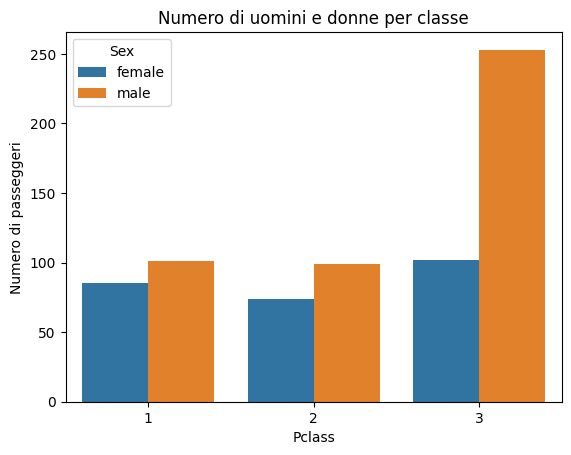

In [129]:

#8-
df.columns
df['Sex'].value_counts()
df.groupby("Pclass")["Sex"].describe()
sns.countplot(data=df, x="Pclass", hue="Sex")
plt.title("Numero di uomini e donne per classe")
plt.xlabel("Pclass")
plt.ylabel("Numero di passeggeri")
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head(20)

#1-
num_species = df["species"].value_counts()
num_species


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [140]:

#2-
df.isna().sum()
print("Lungezze medie:")
media_length = df.groupby("species")["petal_length"].mean()
media_length


Lungezze medie:


species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

In [138]:
print("Largezze medie:")
media_width = df.groupby("species")["petal_width"].mean()
media_width


Largezze medie:


species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

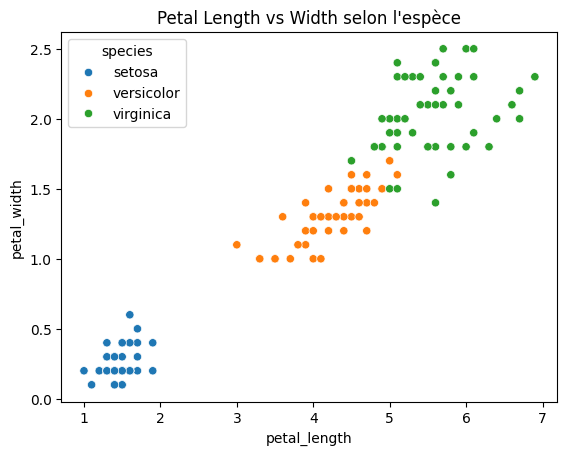

In [145]:

#3-
#sns.scatterplot(data=df, x="species", y="petal_width")
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs Width selon l'espèce")
plt.show()


In [148]:

#4-
df["area_petalo"] = df["petal_length"] * df["petal_width"]
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species,area_petalo
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28


<Axes: xlabel='area_petalo', ylabel='Count'>

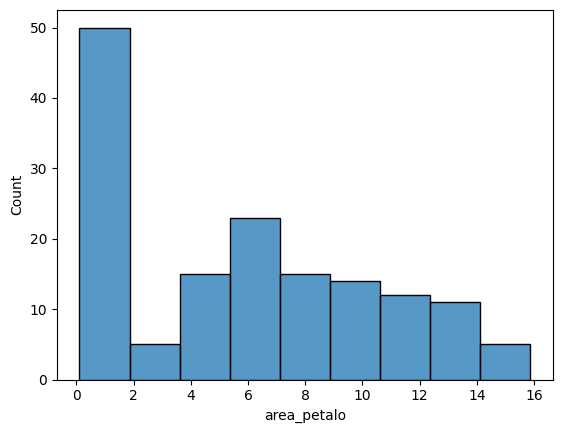

In [151]:

sns.histplot(df["area_petalo"])

In [ ]:
df.groupby("species")["area_petalo"].describe()


,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,0.3656,0.181155,0.11,0.2800,0.300,0.42,0.96
versicolor,50.0,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
virginica,50.0,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


<Axes: ylabel='area_petalo'>

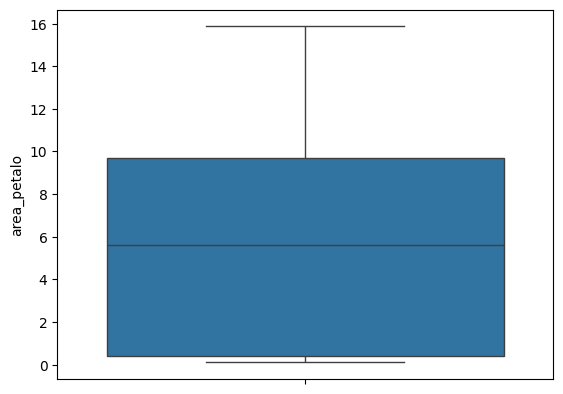

In [157]:
sns.boxplot(df["area_petalo"])


<Axes: xlabel='species', ylabel='area_petalo'>

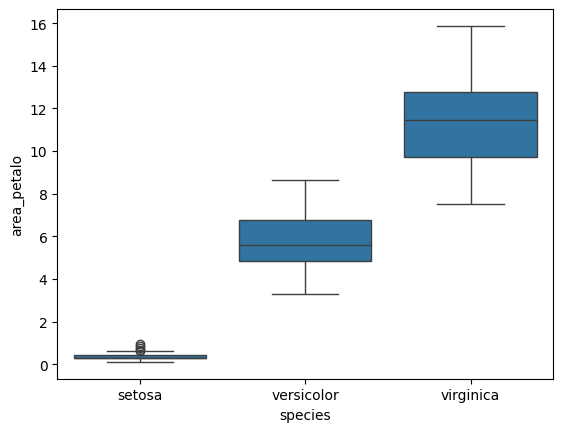

In [162]:

#5-
sns.boxplot(data=df, x="species", y="area_petalo")



